In [1]:
from evasion import *
import gudhi as gd  
import pickle as pickle
from pylab import *
from sklearn.neighbors import KernelDensity
import seaborn as sns
import math

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection


# function to get solid cube coordinates
def getCubeCoordinates(space):
    z, y, x = np.shape(space)
    points = []
    for i in range(z):
        for j in range(y):
            for k in range(x):
                if space[i][j][k] == 0:
                    points.append([k, j, i])
    return np.array(points)

# Function to draw a cube
def draw_cube(ax, coords, size):
    """
    Draw a cube in 3D space.

    Parameters:
    - ax: Matplotlib 3D axis
    - size: Size of the cube
    """
    # Define cube vertices
    vertices = [
        [coords[0], coords[1], coords[2]],
        [coords[0] + size, coords[1], coords[2]],
        [coords[0] + size, coords[1] + size, coords[2]],
        [coords[0], coords[1] + size, coords[2]],
        [coords[0], coords[1], coords[2] + size],
        [coords[0] + size, coords[1], coords[2] + size],
        [coords[0] + size, coords[1] + size, coords[2] + size],
        [coords[0], coords[1] + size, coords[2] + size],
    ]

    # Define cube faces
    faces = [
        [vertices[0], vertices[1], vertices[5], vertices[4]],
        [vertices[7], vertices[6], vertices[2], vertices[3]],
        [vertices[0], vertices[4], vertices[7], vertices[3]],
        [vertices[1], vertices[5], vertices[6], vertices[2]],
        [vertices[4], vertices[5], vertices[6], vertices[7]],
        [vertices[0], vertices[1], vertices[2], vertices[3]]
    ]

    # Plot the cube
    ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=0.5))

def plotCubes(coordsList, spaceDim):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for coord in coordsList:
        draw_cube(ax, coord, size = 1)

    ax.set_xlim(0, spaceDim[2])
    ax.set_ylim(0, spaceDim[1])
    ax.set_zlim(0, spaceDim[0])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('T')

def doesPathExists(space):
    spaceShape = np.shape(space)
    sensorSpace = ~space
    newSpace, tmin, tmax, t_inf = giveSpaceNoTimeDirection(space)
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
    cc_density_crater = gd.PeriodicCubicalComplex(
    dimensions = np.shape(space), 
    top_dimensional_cells = filts,
    periodic_dimensions = [1,0,0] # periodično v z dimenziji
    )
    persistence = cc_density_crater.persistence()
    for p in persistence:
        print(p)
        if p[0] == 1 and p[1][0] == tmin:
            return True
    return False

def getPersistance(space):
    spaceShape = np.shape(space)
    newSpace, tmin, tmax, t_inf = giveSpaceNoTimeDirection(space)
    filts = np.array([newSpace[u, v, z] for z in range(spaceShape[2]) for v in range(spaceShape[1]) for u in range(spaceShape[0])])
    cc_density_crater = gd.PeriodicCubicalComplex(
    dimensions = np.shape(space), 
    top_dimensional_cells = filts,
    periodic_dimensions = [1,0,0] # periodično v z dimenziji
    )
    persistence = cc_density_crater.persistence()
    return persistence, tmin, tmax, t_inf

def drawBarDiagram(space):
    jet = cm.get_cmap("hsv", 256)
    col = jet(np.linspace(0, 1, 4))
    
    persistence, tmin, tmax, t_inf = getPersistance(space)
    jet = cm.get_cmap("hsv", 256)
    col = jet(np.linspace(0, 1, 4))
    id = 0
    for p in persistence:
        print(p)
        c = p[0]
        start, stop = p[1]
        if stop == float("inf"):
            stop = t_inf + 1
        plt.hlines(id, start, stop, color = col[c], label = p)
        id += 1

def drawSensorSlices(space):
    kv = 0
    spaceLenght = len(space)
    while True:
        razlika = kv**2 - spaceLenght
        if razlika >= 0:
            break
        kv += 1
    n_cols = kv
    n_rows = spaceLenght//kv + spaceLenght%kv
    fig, axs = plt.subplots(n_rows, n_cols)
    imId = 0
    for i in range(n_rows):
        for j in range(n_cols):
            axs[i][j].axis("off")
            if imId < spaceLenght:
                axs[i][j].imshow(space[imId])
                # cbar = plt.colorbar(img, ax=axs[i][j])
            axs[i][j].set_xticklabels([])
            axs[i][j].set_yticklabels([])
            imId += 1
    plt.tight_layout()

In [4]:
a = np.array([[[1,2,3], [4,5,6]], [[2,3,4], [3,4,5]]])
b = np.array([1,2])
b = np.reshape(b, (2,1,1))
print(a+b)

[[[2 3 4]
  [5 6 7]]

 [[4 5 6]
  [5 6 7]]]


(1, (0.1, inf))
True


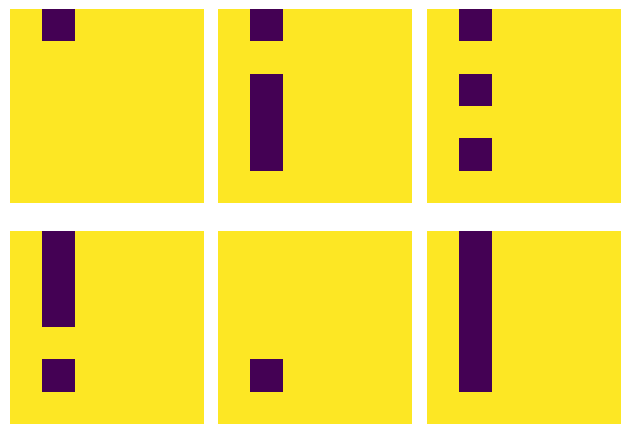

In [93]:
# sensorPath = [[2,0], [2,1], [2,2], [1,2], [0,2], [0,1], [0,0], [1,0]]
# sensor = Sensor(sensorPath)
# space = sensor.getSensorArea((4,4))

#razpolovljen prostor
# space = np.zeros((15,15,15))
# space[5:8,:,:] = 1

# sensorList = [[[1,1],[1,3]], [[1,1],[4,1]]]
# sensorSpace = SensorsSpace((6,6), sensorList)
# space = sensorSpace.createSpace()


#ravna pot
# spaceShape = (8,6,6)
# space = np.ones(spaceShape, dtype=bool)
# space[:4,2,2] = False
# space[2:,3,4] = False

# # potovanje v času
spaceShape = (6,6,6)
space = np.ones(spaceShape, dtype=bool)
space[0,0,1] = 0
space[1,[0,2,3,4],1] = 0
space[2,[0,2,4],1] = 0
space[3,[0,1,2,4],1] = 0
space[4,4,1] = 0
space[5,0:5,1] = 0



# drawBarDiagram(space)
print(doesPathExists(space))
drawSensorSlices(space)

### Show persistance diagram

inf


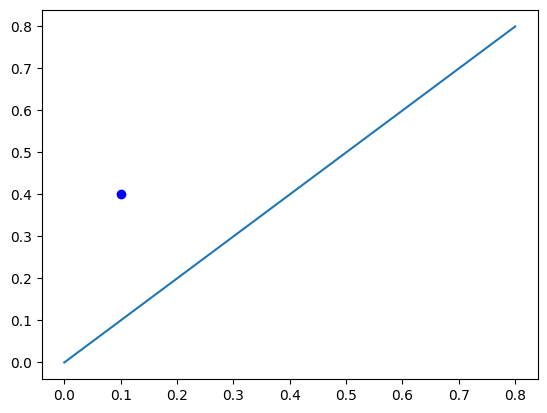

In [61]:
dim = 1
points = []
for p in persistence:
    if p[0] == dim:
        if p[1][1] == float("inf"):
            print("inf")
        points.append(p[1])

points = np.array(points)
x = np.linspace(0, np.max(points[:,0]))
plt.plot(points[:,0], points[:, 1], "bo")
plt.plot(x,x)
plt.show()

#### Show all slices

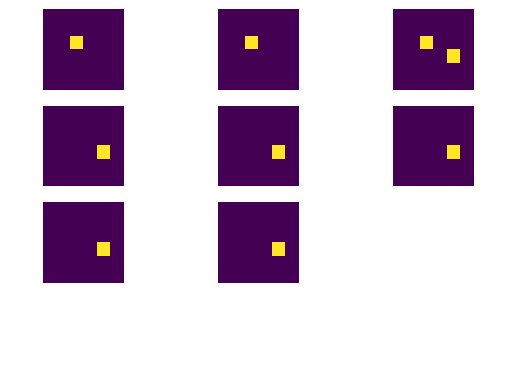

In [62]:

        
plt.show()

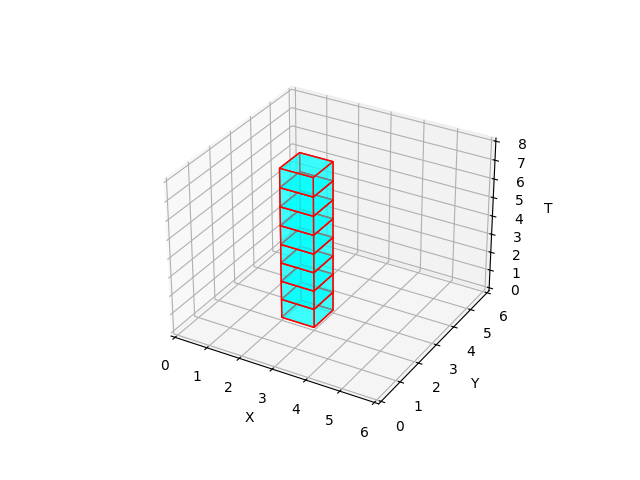

AttributeError: 'LineCollection' object has no attribute 'do_3d_projection'

In [499]:
%matplotlib widget
coordsList = getCubeCoordinates(space)
plotCubes(coordsList, spaceShape)
plt.show()
